In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = datasets.load_iris()
print(df)
x = df.data[:, :]  # we only take the first two features.
y = df.target
print(y)
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)
num_rows, num_cols = X.shape
# b = np.zeros((np.shape(X)[0],1))
# b = np.zeros((num_rows,1))
# X=np.hstack((X,b))
# print(b)
print(X.shape)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [46]:
def kmeans(df, k):
    max_iter = 100
    tolerance = 10**(-3)
    list_Sum_Distortion_Function=[]
    n_samples = X.shape[0]
    n_features = X.shape[1]
    outputsY = np.zeros(n_samples, dtype = np.int64) #classification
    # Choose initial cluster centroids randomly
    I = np.random.choice(n_samples, k)
    centroids = X[I, :]
#     print(I,"\n\n",centroids)
    Sum_Distortion_Function = 0  #loss
    for m in range(0, max_iter):
        
        # Compute the LABEL
        for i in range(0, n_samples):
            distances = np.zeros(k)
            for j in range(0, k):
                distances[j] = np.sqrt(np.sum(np.power(X[i, :] - centroids[j], 2))) 
            outputsY[i] = np.argmin(distances)
        # Compute the new centroids and new loss
        new_centroids = np.zeros((k, n_features))
        new_Sum_Distortion_Function = 0
        for j in range(0, k):
            # compute centroids
            J = np.where(outputsY == j)
            X_C = X[J]
            new_centroids[j] = X_C.mean(axis = 0)
            # Compute loss
            for i in range(0, X_C.shape[0]):
                new_Sum_Distortion_Function += np.sum(np.power(X_C[i, :] - centroids[j], 2))
        list_Sum_Distortion_Function.append(new_Sum_Distortion_Function)   
        if np.abs(Sum_Distortion_Function - new_Sum_Distortion_Function) < tolerance:
            return new_centroids, outputsY, new_Sum_Distortion_Function,list_Sum_Distortion_Function
        centroids = new_centroids
        Sum_Distortion_Function = new_Sum_Distortion_Function
    print("Failed to converge!")
    return centroids, outputsY, Sum_Distortion_Function,list_Sum_Distortion_Function


print(kmeans(X, 3))

(array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.16743407,  0.14530299,  1.00302557,  1.0300019 ],
       [-0.01139555, -0.87600831,  0.37707573,  0.31115341]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64), 140.0327527742865, [1012.0029937708103, 341.67379953566643, 255.22111905714436, 186.50261895326392, 151.21306198017874, 143.9099710553184, 141.2171900120554, 140.36037767659766, 140.08951698482215, 140.0327527742865, 140.0327527742865])


for number of cluster 2
[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.50728948 -0.42663134  0.65249366  0.62744675]]
for number of cluster 3
[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


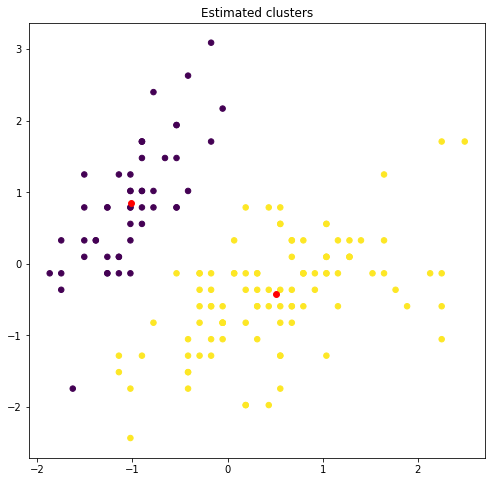

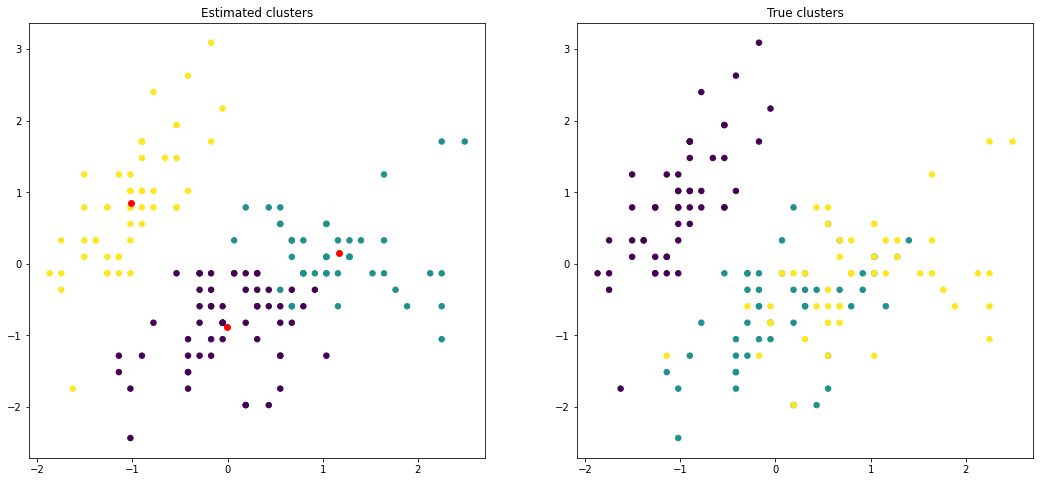

for number of cluster 4
[[-1.35230687  0.11914427 -1.31439133 -1.29749445]
 [-0.74922133  1.43007001 -1.29759846 -1.22142131]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
for number of cluster 5
[[-1.32476872e+00  1.74949542e-01 -1.30943959e+00 -1.28802092e+00]
 [-7.28249970e-01  1.47939788e+00 -1.30087754e+00 -1.22431432e+00]
 [ 1.30885058e+00  1.72692711e-01  1.12384310e+00  1.17395260e+00]
 [-3.64080601e-01 -1.41450432e+00  1.07774588e-01  8.77547895e-04]
 [ 3.08304915e-01 -4.18446566e-01  5.50565209e-01  5.06930168e-01]]
for number of cluster 6
[[-0.33846225 -1.30137905  0.13982007  0.05879571]
 [-0.57445998  1.95749886 -1.27027277 -1.20406322]
 [ 1.40150837  0.23463019  1.20272206  1.28307253]
 [-0.97338189  0.90390597 -1.29759846 -1.22988338]
 [ 0.44478706 -0.34299318  0.61000768  0.55482966]
 [-1.3996077  -0.05073356 -1.34022653 -1.32318736]]
for number of cluster 7
[[ 3.08304915e-01 -4.18446566e-01  5.50565209e-01  5.069

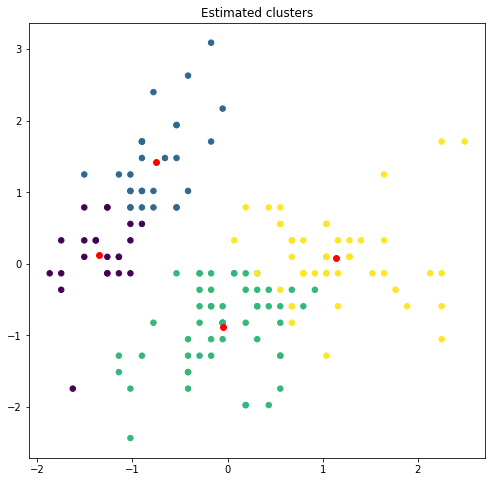

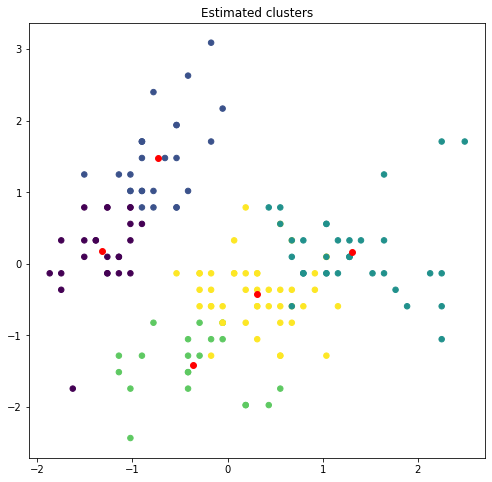

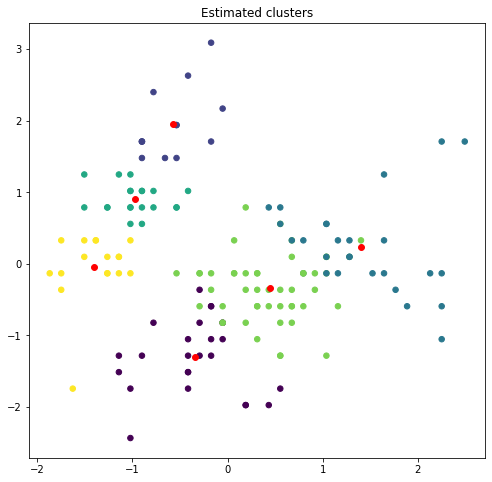

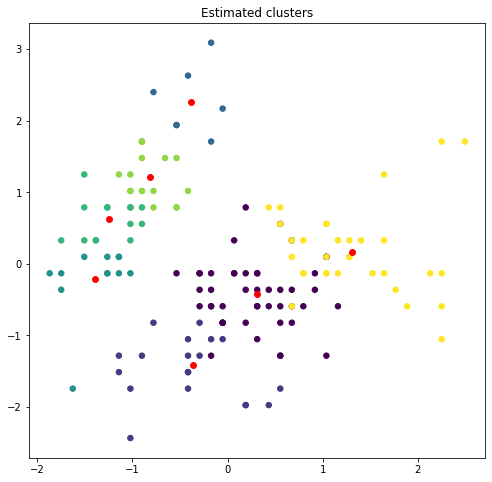

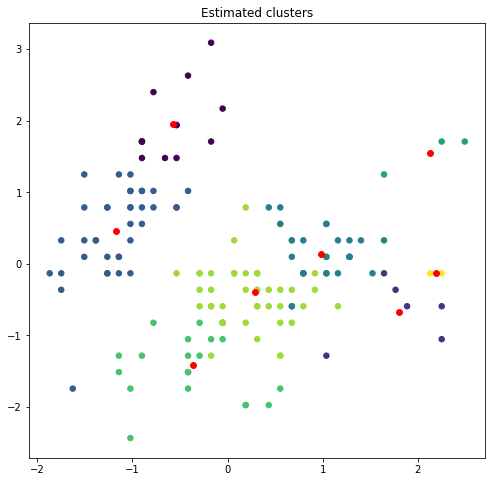

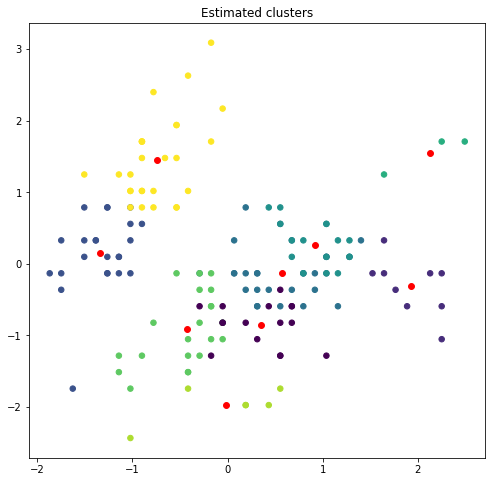

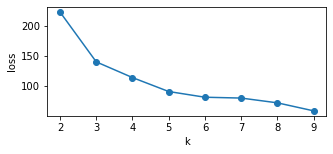

In [64]:
list_Elbow=[]
for Num_Cluster in range (2,10):
    centers, classifications, loss,list_Sum_Distortion_Function = kmeans(X, Num_Cluster)
    list_Elbow.append(loss)
    print("for number of cluster",Num_Cluster)
    print(centers)
    # Plot
    fig = plt.figure(figsize=(18, 8))
    fig.tight_layout()
    s1 = plt.subplot(1, 2, 1)
    s1.set_title("Estimated clusters")
    s1.scatter(X[:, 0], X[:, 1], c = classifications, s = 30)
    s1.scatter(centers[:, 0], centers[:,1], c = "r", s = 35)
    if Num_Cluster ==3:
        s2 = plt.subplot(1, 2, 2)
        s2.set_title("True clusters")
        s2.scatter(X[:, 0], X[:, 1], c = y, s = 30)
        plt.show() 
    
print(list_Elbow)
fig = plt.figure(figsize=(5, 2))
fig.tight_layout()
ss=np.array(range (2,10))
plt.plot(ss, list_Elbow, marker = "o")
plt.xlabel("k")
plt.ylabel("loss")
plt.show()